## 1. Problem Statement

Traditional tree-based methods perform poorly or become inconsistent in high-dimensional settings where the number of variables **p** greatly exceeds the sample size **n** (**p ≫ n**), and only a small unknown subset of variables (**p₁ ≪ p**) truly carries the signal (sparse signal).

---

### **State of the Art in 2015**

By 2015, while **Random Forests** (Breiman, 2001) and **Gradient Boosting** (Friedman, 2001) dominated as state-of-the-art ensemble methods for moderate-dimensional data, they faltered in ultra-high-dimensional sparse regimes due to their reliance on random or greedy feature sampling, which amplifies noise pollution without built-in sparsity mechanisms.

Emerging alternatives included:

- **Oblique Random Forests (ORF)** (e.g., Menze et al., 2011), which used linear combinations for splits to better handle correlations but lacked theoretical guarantees for **p → ∞**.  
- **Bayesian Additive Regression Trees (BART)** (Chipman et al., 2010), offering prior-based regularization for sparsity yet computationally intensive.  
- Early embedding-based approaches like **Sparse Local Embeddings for Extreme Classification (SLEEC)** (Bhatia et al., 2015), which projected high-dimensional features into low-dimensional spaces but were not tree-native and struggled with interpretability in tree ensembles.

These methods improved on classical trees in specific niches (e.g., multi-label tasks or budgeted classification) but **failed to provide a unified, theoretically consistent tree-based solution** for sparse high-dimensional regression/classification.

This left a **critical gap** for applications demanding both **accuracy** and **scalability**.

---

### **Primary Users and Stakeholders**

This problem disproportionately affects:

- **Bioinformaticians and genomic researchers** analyzing high-dimensional omics data  
  (e.g., 20,000+ genes in microarrays for cancer biomarker discovery).  
- **Medical imaging specialists** processing sparse voxel data in fMRI or CT scans for disease diagnosis.  
- **Fraud detection analysts** in finance sifting through millions of transaction features to flag anomalies.  
- **Proteomics experts** in drug discovery handling sparse mass spectrometry profiles for protein pathway identification.

These users—often in **academia**, **pharmaceuticals**, **healthcare**, and **fintech**—face:

- computational bottlenecks,  
- unreliable feature selection,  
- regulatory demands for interpretable models.

This leads to **delayed insights**, **higher costs**, and **missed opportunities** in precision medicine and risk assessment.


## BO1
Define advanced learning strategies

## BO2
Compare classical models using advanced strategies

## BO3
Increase model flexibility & adaptability (speed + variable selection)


## DSO1
Implement Reinforcement Learning Trees (RLT) using:
- Embedded models
- Variable muting
- Linear combination splits

## DSO2
DSO2: Compare RLT variants and competing methods

## DSO3
Prove theoretical consistency of RLT in ultra-high-dimensional sparse settings (**p → ∞**) where the error depends only on the number of true variables (**p₁**), not on the total number of variables (**p**).
tent under these conditions.


| **DSO**   | **Objective**                                                      | **Model(s)**                                      | **Datasets**                                  | **Important Variables (examples)**                                | **Key Hyperparameters**                                      |
|-----------|--------------------------------------------------------------------|-------------------------------------------------|-----------------------------------------------|------------------------------------------------------------------|--------------------------------------------------------------|
| **DSO1**  | Implement Reinforcement Learning Trees (RLT) using embedded models, variable muting, and linear combination splits | **RLT (Reinforcement Learning Trees)**       | 10 UCI datasets + high-dimensional simulations | Cement, Age, Superplasticizer, LSTAT, RM, Sonar frequencies, Clump thickness, Cell uniformity | Embedded Extra-Trees (50 trees, depth=3), VI via OOB permutation, **pd=0.5**, linear splits (k=1–5), α=0.25 |
| **DSO2**  | Compare RLT with new strategies vs classic models | **RLT simple**, **RLT + linear combination splits**, **RLT naive**, **RLT with different muting levels**, LASSO, BART, CART, purely Random Forests, Extremely Randomized Trees, Random Forest | Same 10 UCI datasets (Concrete, Boston, Sonar, Breast Cancer, Wine, Parkinson, Ozone, etc.) | RLT variants select **fewer and more relevant** variables than baselines | ntree=500, nodesize=5, 5-fold CV tuning for all models, RLT with pd=0.5 and embedded model |
| **DSO3**  | Prove theoretical consistency of RLT in ultra-high-dimensional sparse settings (p → ∞) where error depends only on the number of true variables (p₁), not total p | **RLT with Linear Combination Splits + High Muting** | High-dimensional simulations (p=1000–5000), real datasets + added noise columns | **Only the true strong variables (p₁)** are selected — perfectly recovers 4–10 real signals even with 5000 noise variables | **pd=0.5** (mute 50% weakest per level), **k=3**, **α=0.25**, coefficient βⱼ = sign(corr)×√VIⱼ, convergence depends only on p₁ (theoretical proof) |

### Reference
Zhu, R., Zeng, D., & Kosorok, M. R. (2015). **Reinforcement Learning Trees**. *Journal of the American Statistical Association*, 110(512), 1778–1791. [https://doi.org/10.1080/01621459.2015.1036994](https://doi.org/10.1080/01621459.2015.1036994)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def exploratory_data_analysis(file_path, target_column=None, categorical_mappings=None):
    """
    Effectue une analyse exploratoire complète d'un dataset.
    
    Paramètres :
    -----------
    file_path : str
        Chemin vers le fichier CSV du dataset.
    target_column : str, optionnel
        Nom de la variable cible pour certaines analyses (ex: corrélations triées).
    categorical_mappings : dict, optionnel
        Dictionnaire de mappings pour encoder les colonnes catégorielles.
        Exemple : {'sex': {'male': 1, 'female': 0}, 'smoker': {'yes': 1, 'no': 0}}
    
    Retour :
    -------
    data : pandas.DataFrame
        Le dataset chargé pour des analyses ultérieures.
    """
    # Charger le dataset
    data = pd.read_csv(file_path)
    print("\n=== Head ===")
    display(data.head())
    print("\n=== Shape ===")
    print(data.shape)
    print("\n=== Types ===")
    print(data.dtypes)
    print("\n=== Info ===")
    print(data.info())
    print("\n=== Statistiques descriptives ===")
    display(data.describe())
    
    # Analyse des valeurs manquantes
    print("="*70)
    print("MISSING VALUES ANALYSIS")
    print("="*70)
    missing_counts = data.isnull().sum()
    missing_percentages = (missing_counts / len(data)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing_counts,
        'Percentage (%)': missing_percentages
    })
    display(missing_df)
    
    if missing_counts.sum() > 0:
        plt.figure(figsize=(10, 6))
        missing_df['Percentage (%)'].plot(kind='bar', color='coral', edgecolor='black')
        plt.title('Percentage of Missing Values by Variable', fontsize=14, fontweight='bold')
        plt.ylabel('Percentage (%)')
        plt.xlabel('Variables')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("\n✅ No missing values detected in the dataset!")

    # Identifier les colonnes numériques
    numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    
    # Histogrammes
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=False, color="red", edgecolor="black", linewidth=1.5, bins=30)
        plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=12, fontweight='bold')
        plt.ylabel('Frequency', fontsize=12, fontweight='bold')
        plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.8)
        plt.tight_layout()
        plt.show()
    
    # Boxplots
    fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
    if len(numerical_cols) == 1:
        axes = [axes]
    for i, column in enumerate(numerical_cols):
        sns.boxplot(x=data[column], ax=axes[i], color='red')
        axes[i].set_title(f'Boxplot de {column}')
        axes[i].set_xlabel(column)
    plt.tight_layout()
    plt.show()
    
    # Détection des outliers
    for column in numerical_cols:
        print(f"\n=== Outliers pour {column} ===")
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_positions = ((data[column] < lower_bound) | (data[column] > upper_bound))
        print(f"Nombre d'outliers : {outlier_positions.sum()}")
    
    # Pairplot
    sns.pairplot(data[numerical_cols], diag_kind='hist', plot_kws={'alpha':0.6,'color':'red'}, diag_kws={'color':'red'})
    plt.suptitle('Matrice de scatter plots', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Corrélation
    data_encoded = data.copy()
    if categorical_mappings:
        for col, mapping in categorical_mappings.items():
            data_encoded[col] = data_encoded[col].map(mapping)
    else:
        # Encode automatiquement les catégorielles
        cat_cols = data_encoded.select_dtypes(include=['object','category']).columns
        for col in cat_cols:
            data_encoded[col] = data_encoded[col].astype('category').cat.codes

    correlation_matrix = data_encoded.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True,
                linewidths=1, cbar_kws={'label':'Coefficient de corrélation'})
    plt.title('Matrice de corrélation des variables', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    if target_column:
        print(f"\n=== Corrélations avec {target_column} (triées) ===")
        print(correlation_matrix[target_column].sort_values(ascending=False))
    
    return data


In [2]:
def exploratory_data_analysis_df(data, target_column=None, categorical_mappings=None):
    """
    Analyse exploratoire complète d'un dataset déjà chargé en DataFrame.
    
    Paramètres :
    -----------
    data : pandas.DataFrame
        Dataset déjà chargé.
    target_column : str, optionnel
        Nom de la variable cible pour certaines analyses.
    categorical_mappings : dict, optionnel
        Dictionnaire de mappings pour encoder les colonnes catégorielles.
    
    Retour :
    -------
    data : pandas.DataFrame
        Le dataset original pour analyses ultérieures.
    """
    # Head, shape, types
    print("\n=== Head ===")
    display(data.head())
    print("\n=== Shape ===")
    print(data.shape)
    print("\n=== Types ===")
    print(data.dtypes)
    print("\n=== Info ===")
    print(data.info())
    print("\n=== Statistiques descriptives ===")
    display(data.describe())
    
    # Analyse des valeurs manquantes
    print("="*70)
    print("MISSING VALUES ANALYSIS")
    print("="*70)
    missing_counts = data.isnull().sum()
    missing_percentages = (missing_counts / len(data)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing_counts,
        'Percentage (%)': missing_percentages
    })
    display(missing_df)
    
    if missing_counts.sum() > 0:
        plt.figure(figsize=(10, 6))
        missing_df['Percentage (%)'].plot(kind='bar', color='coral', edgecolor='black')
        plt.title('Percentage of Missing Values by Variable', fontsize=14, fontweight='bold')
        plt.ylabel('Percentage (%)')
        plt.xlabel('Variables')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("\n✅ No missing values detected in the dataset!")
    
    # Colonnes numériques
    numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    
    # Histogrammes
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=False, color="red", edgecolor="black", linewidth=1.5, bins=30)
        plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=12, fontweight='bold')
        plt.ylabel('Frequency', fontsize=12, fontweight='bold')
        plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.8)
        plt.tight_layout()
        plt.show()
    
    # Boxplots
    fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
    if len(numerical_cols) == 1:
        axes = [axes]
    for i, column in enumerate(numerical_cols):
        sns.boxplot(x=data[column], ax=axes[i], color='red')
        axes[i].set_title(f'Boxplot de {column}')
        axes[i].set_xlabel(column)
    plt.tight_layout()
    plt.show()
    
    # Outliers
    for column in numerical_cols:
        print(f"\n=== Outliers pour {column} ===")
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_positions = ((data[column] < lower_bound) | (data[column] > upper_bound))
        print(f"Nombre d'outliers : {outlier_positions.sum()}")
    
    # Pairplot
    sns.pairplot(data[numerical_cols], diag_kind='hist', plot_kws={'alpha':0.6,'color':'red'}, diag_kws={'color':'red'})
    plt.suptitle('Matrice de scatter plots', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Corrélation
    data_encoded = data.copy()
    if categorical_mappings:
        for col, mapping in categorical_mappings.items():
            data_encoded[col] = data_encoded[col].map(mapping)
    else:
        cat_cols = data_encoded.select_dtypes(include=['object','category']).columns
        for col in cat_cols:
            data_encoded[col] = data_encoded[col].astype('category').cat.codes

    correlation_matrix = data_encoded.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True,
                linewidths=1, cbar_kws={'label':'Coefficient de corrélation'})
    plt.title('Matrice de corrélation des variables', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    if target_column:
        print(f"\n=== Corrélations avec {target_column} (triées) ===")
        print(correlation_matrix[target_column].sort_values(ascending=False))
    
    return data



=== Head ===


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



=== Shape ===
(1599, 12)

=== Types ===
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


MISSING VALUES ANALYSIS


,Missing Values,Percentage (%)
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0



✅ No missing values detected in the dataset!


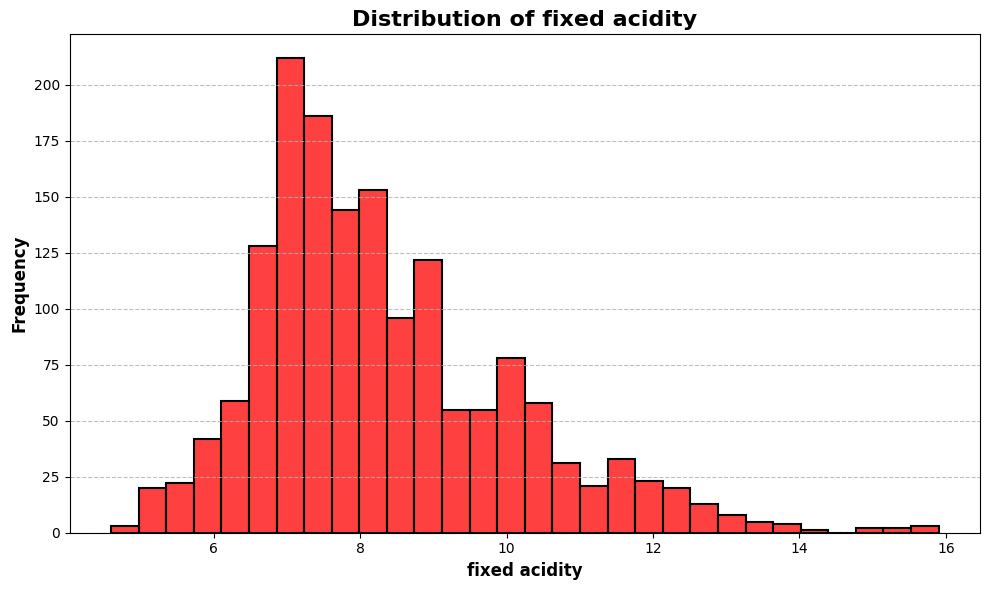

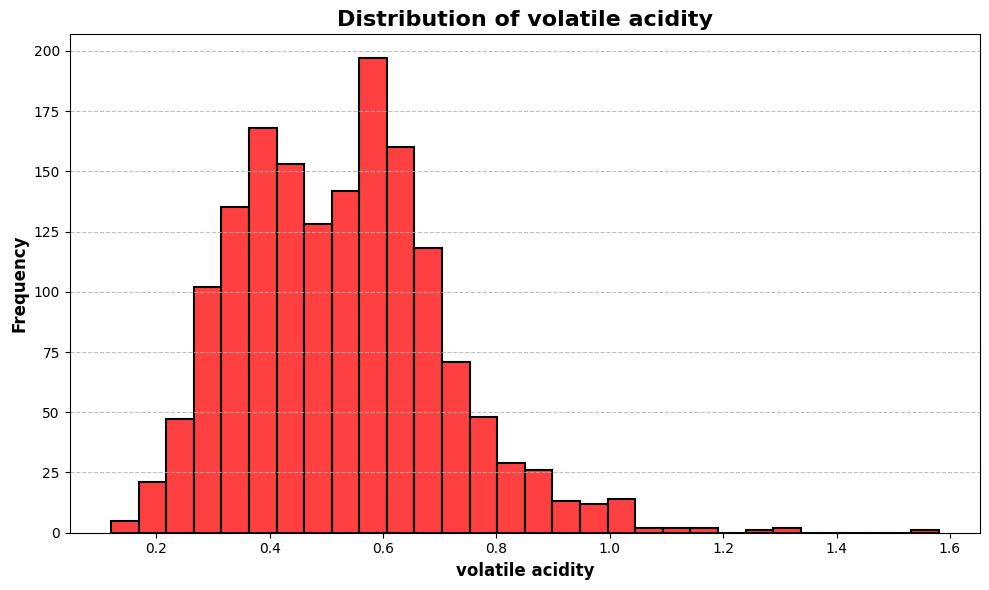

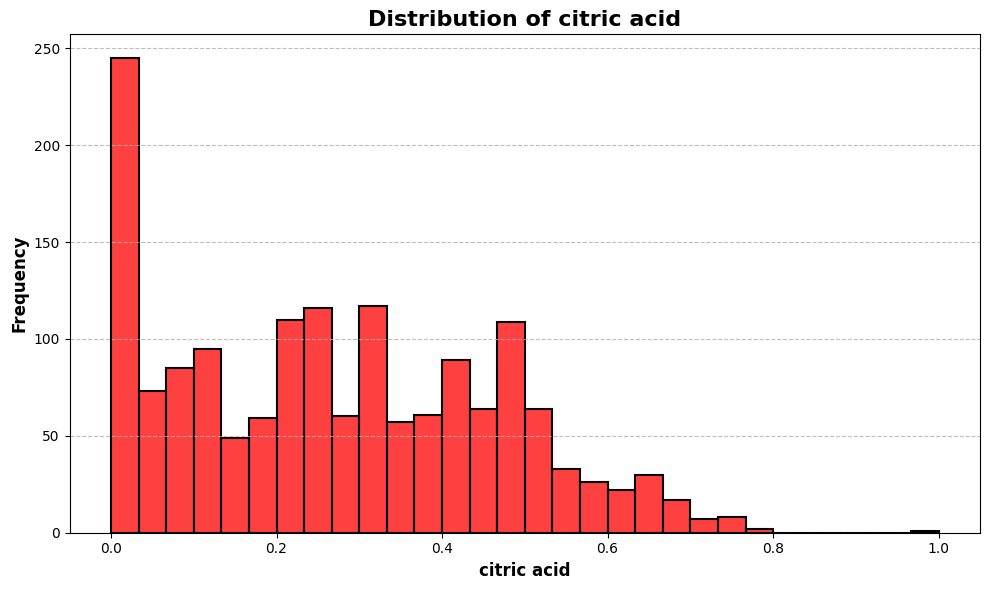

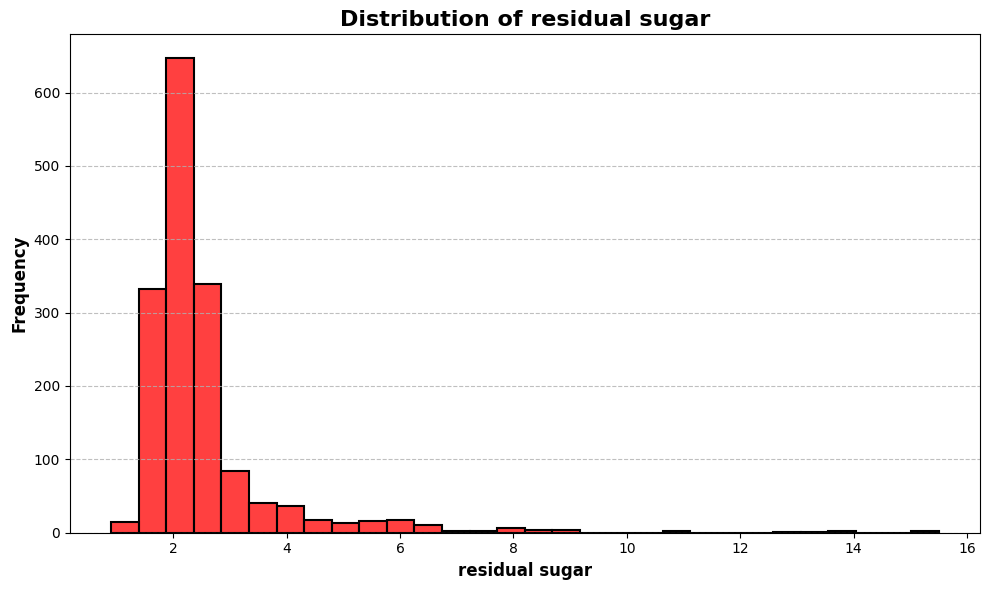

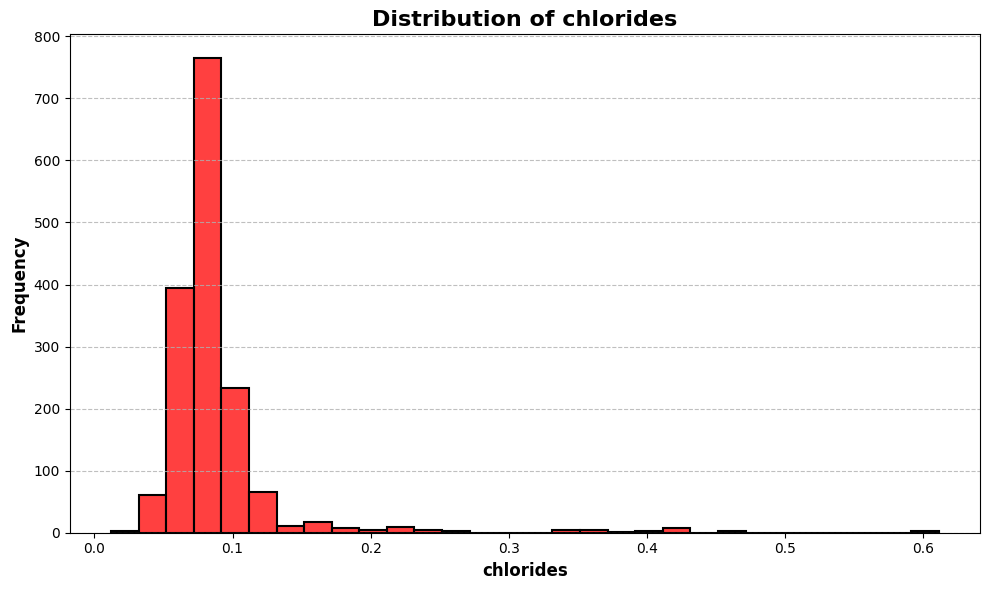

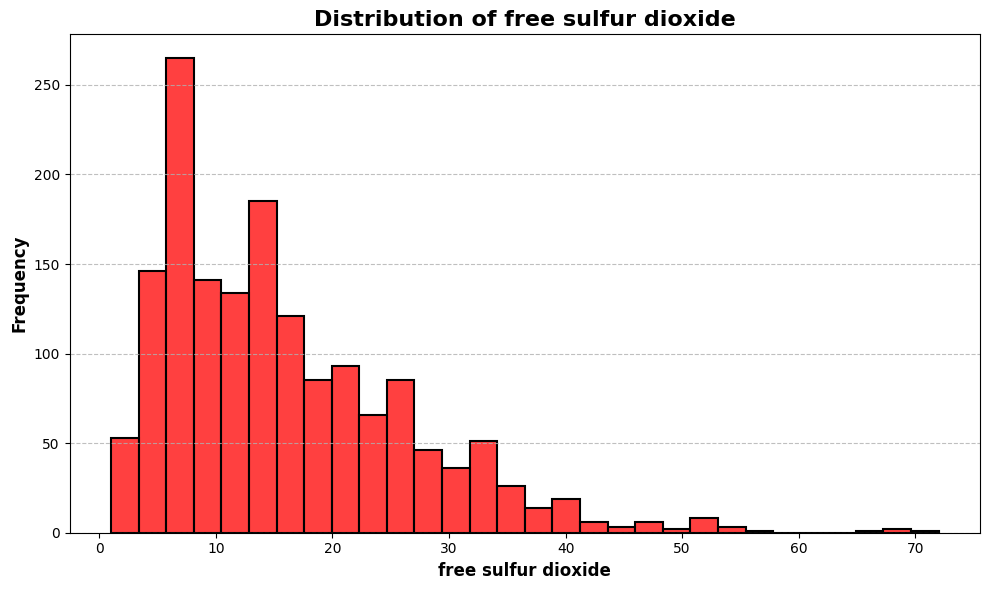

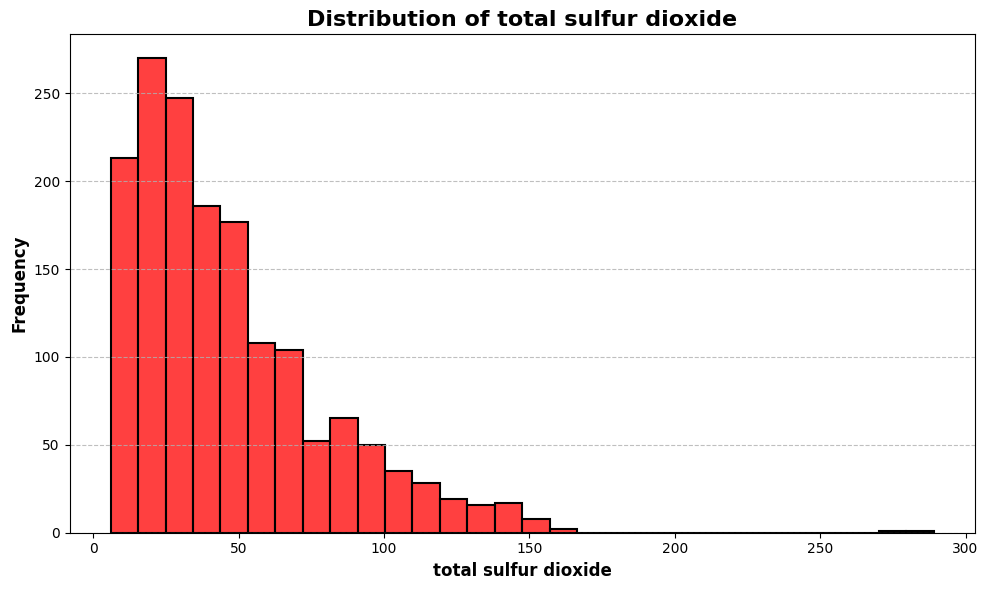

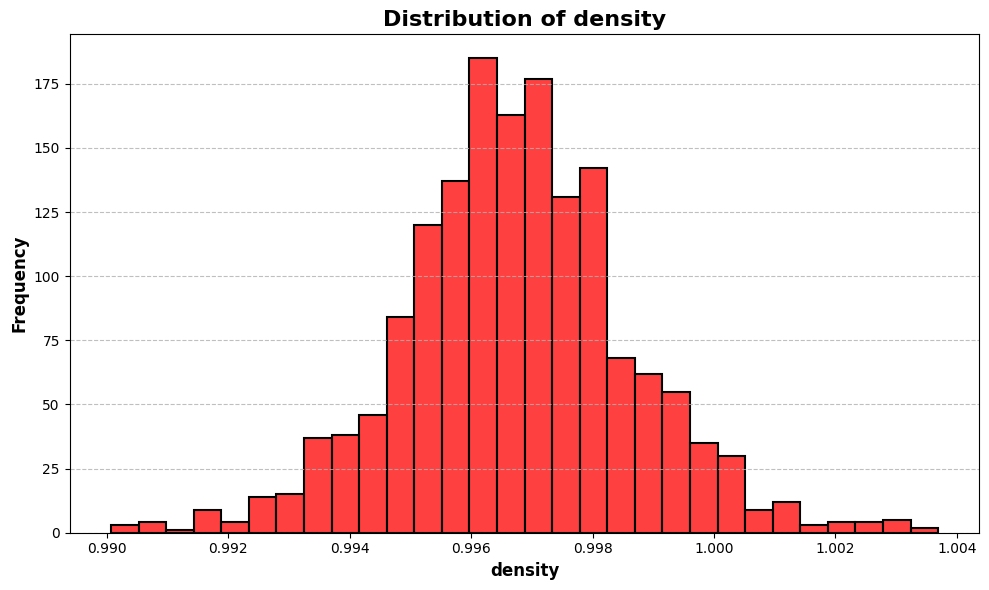

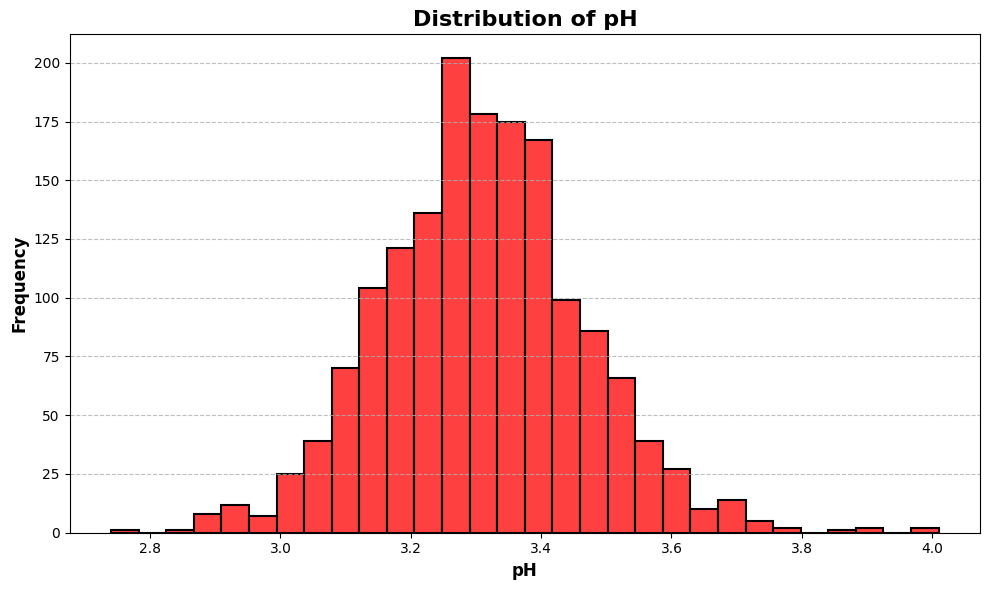

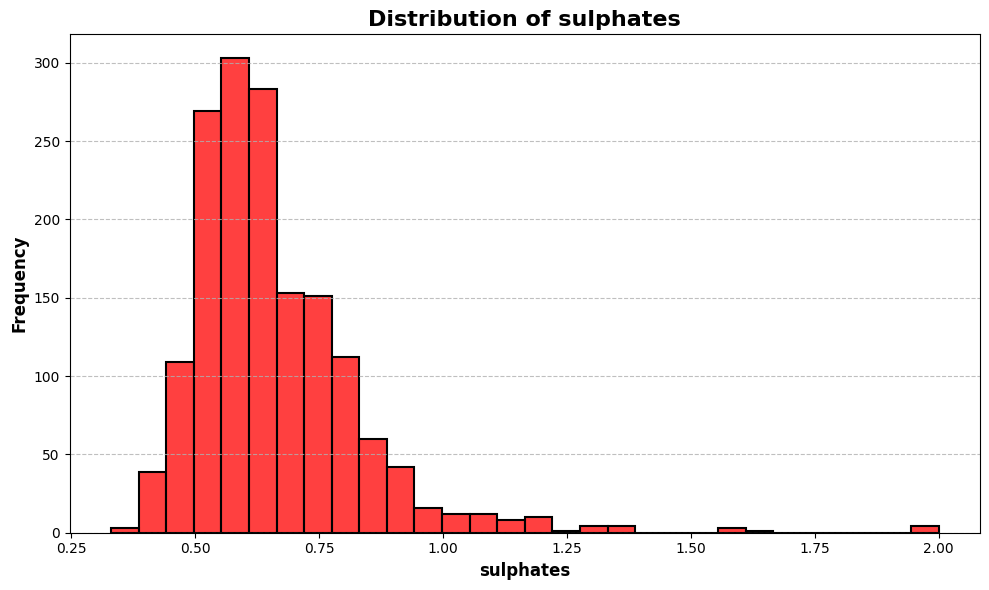

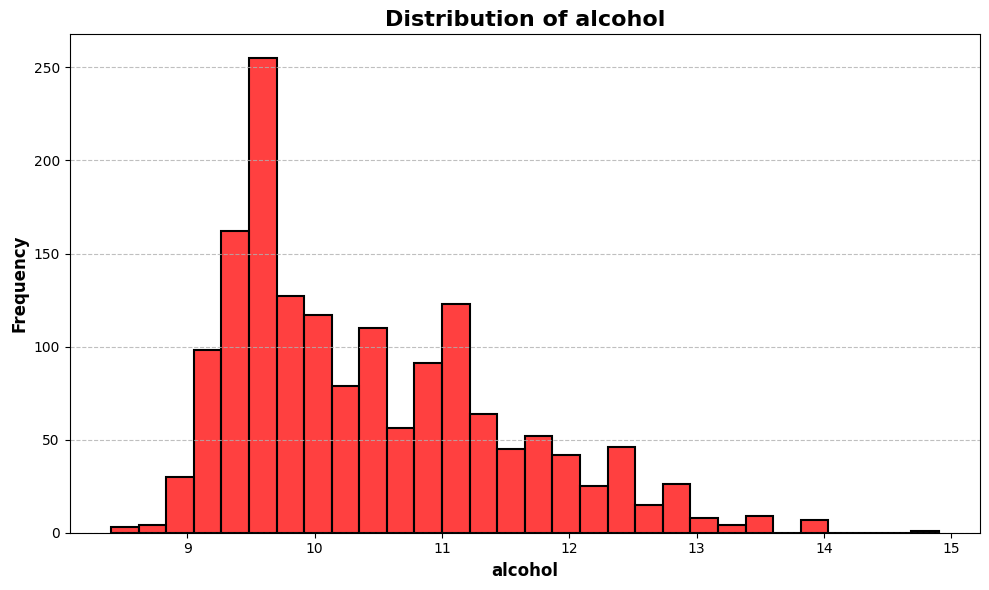

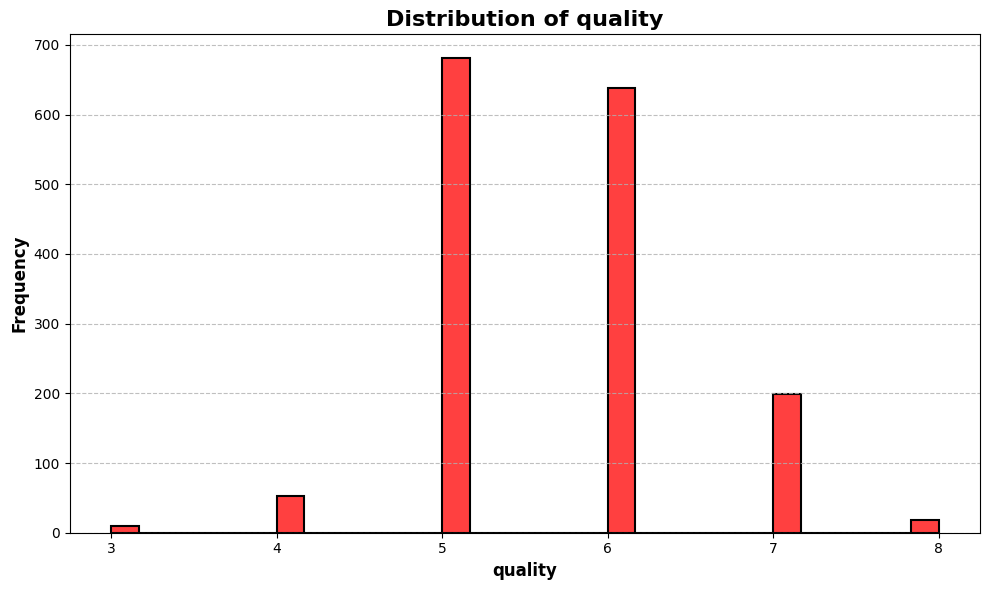

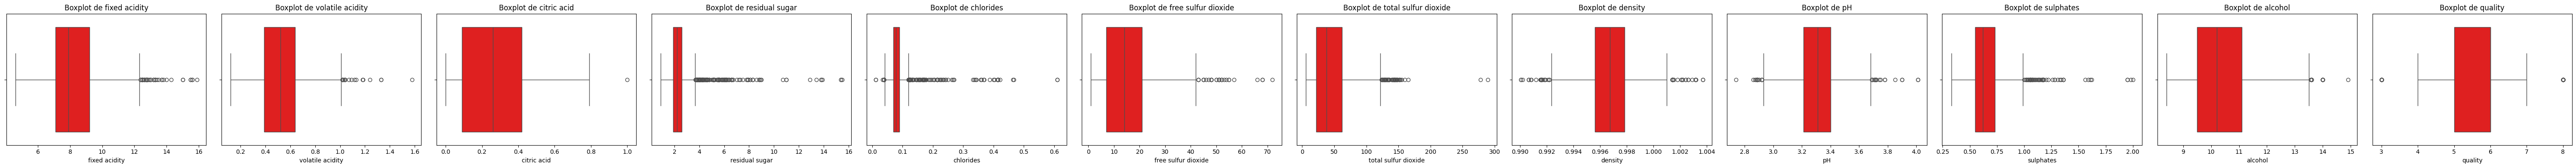


=== Outliers pour fixed acidity ===
Nombre d'outliers : 49

=== Outliers pour volatile acidity ===
Nombre d'outliers : 19

=== Outliers pour citric acid ===
Nombre d'outliers : 1

=== Outliers pour residual sugar ===
Nombre d'outliers : 155

=== Outliers pour chlorides ===
Nombre d'outliers : 112

=== Outliers pour free sulfur dioxide ===
Nombre d'outliers : 30

=== Outliers pour total sulfur dioxide ===
Nombre d'outliers : 55

=== Outliers pour density ===
Nombre d'outliers : 45

=== Outliers pour pH ===
Nombre d'outliers : 35

=== Outliers pour sulphates ===
Nombre d'outliers : 59

=== Outliers pour alcohol ===
Nombre d'outliers : 13

=== Outliers pour quality ===
Nombre d'outliers : 28


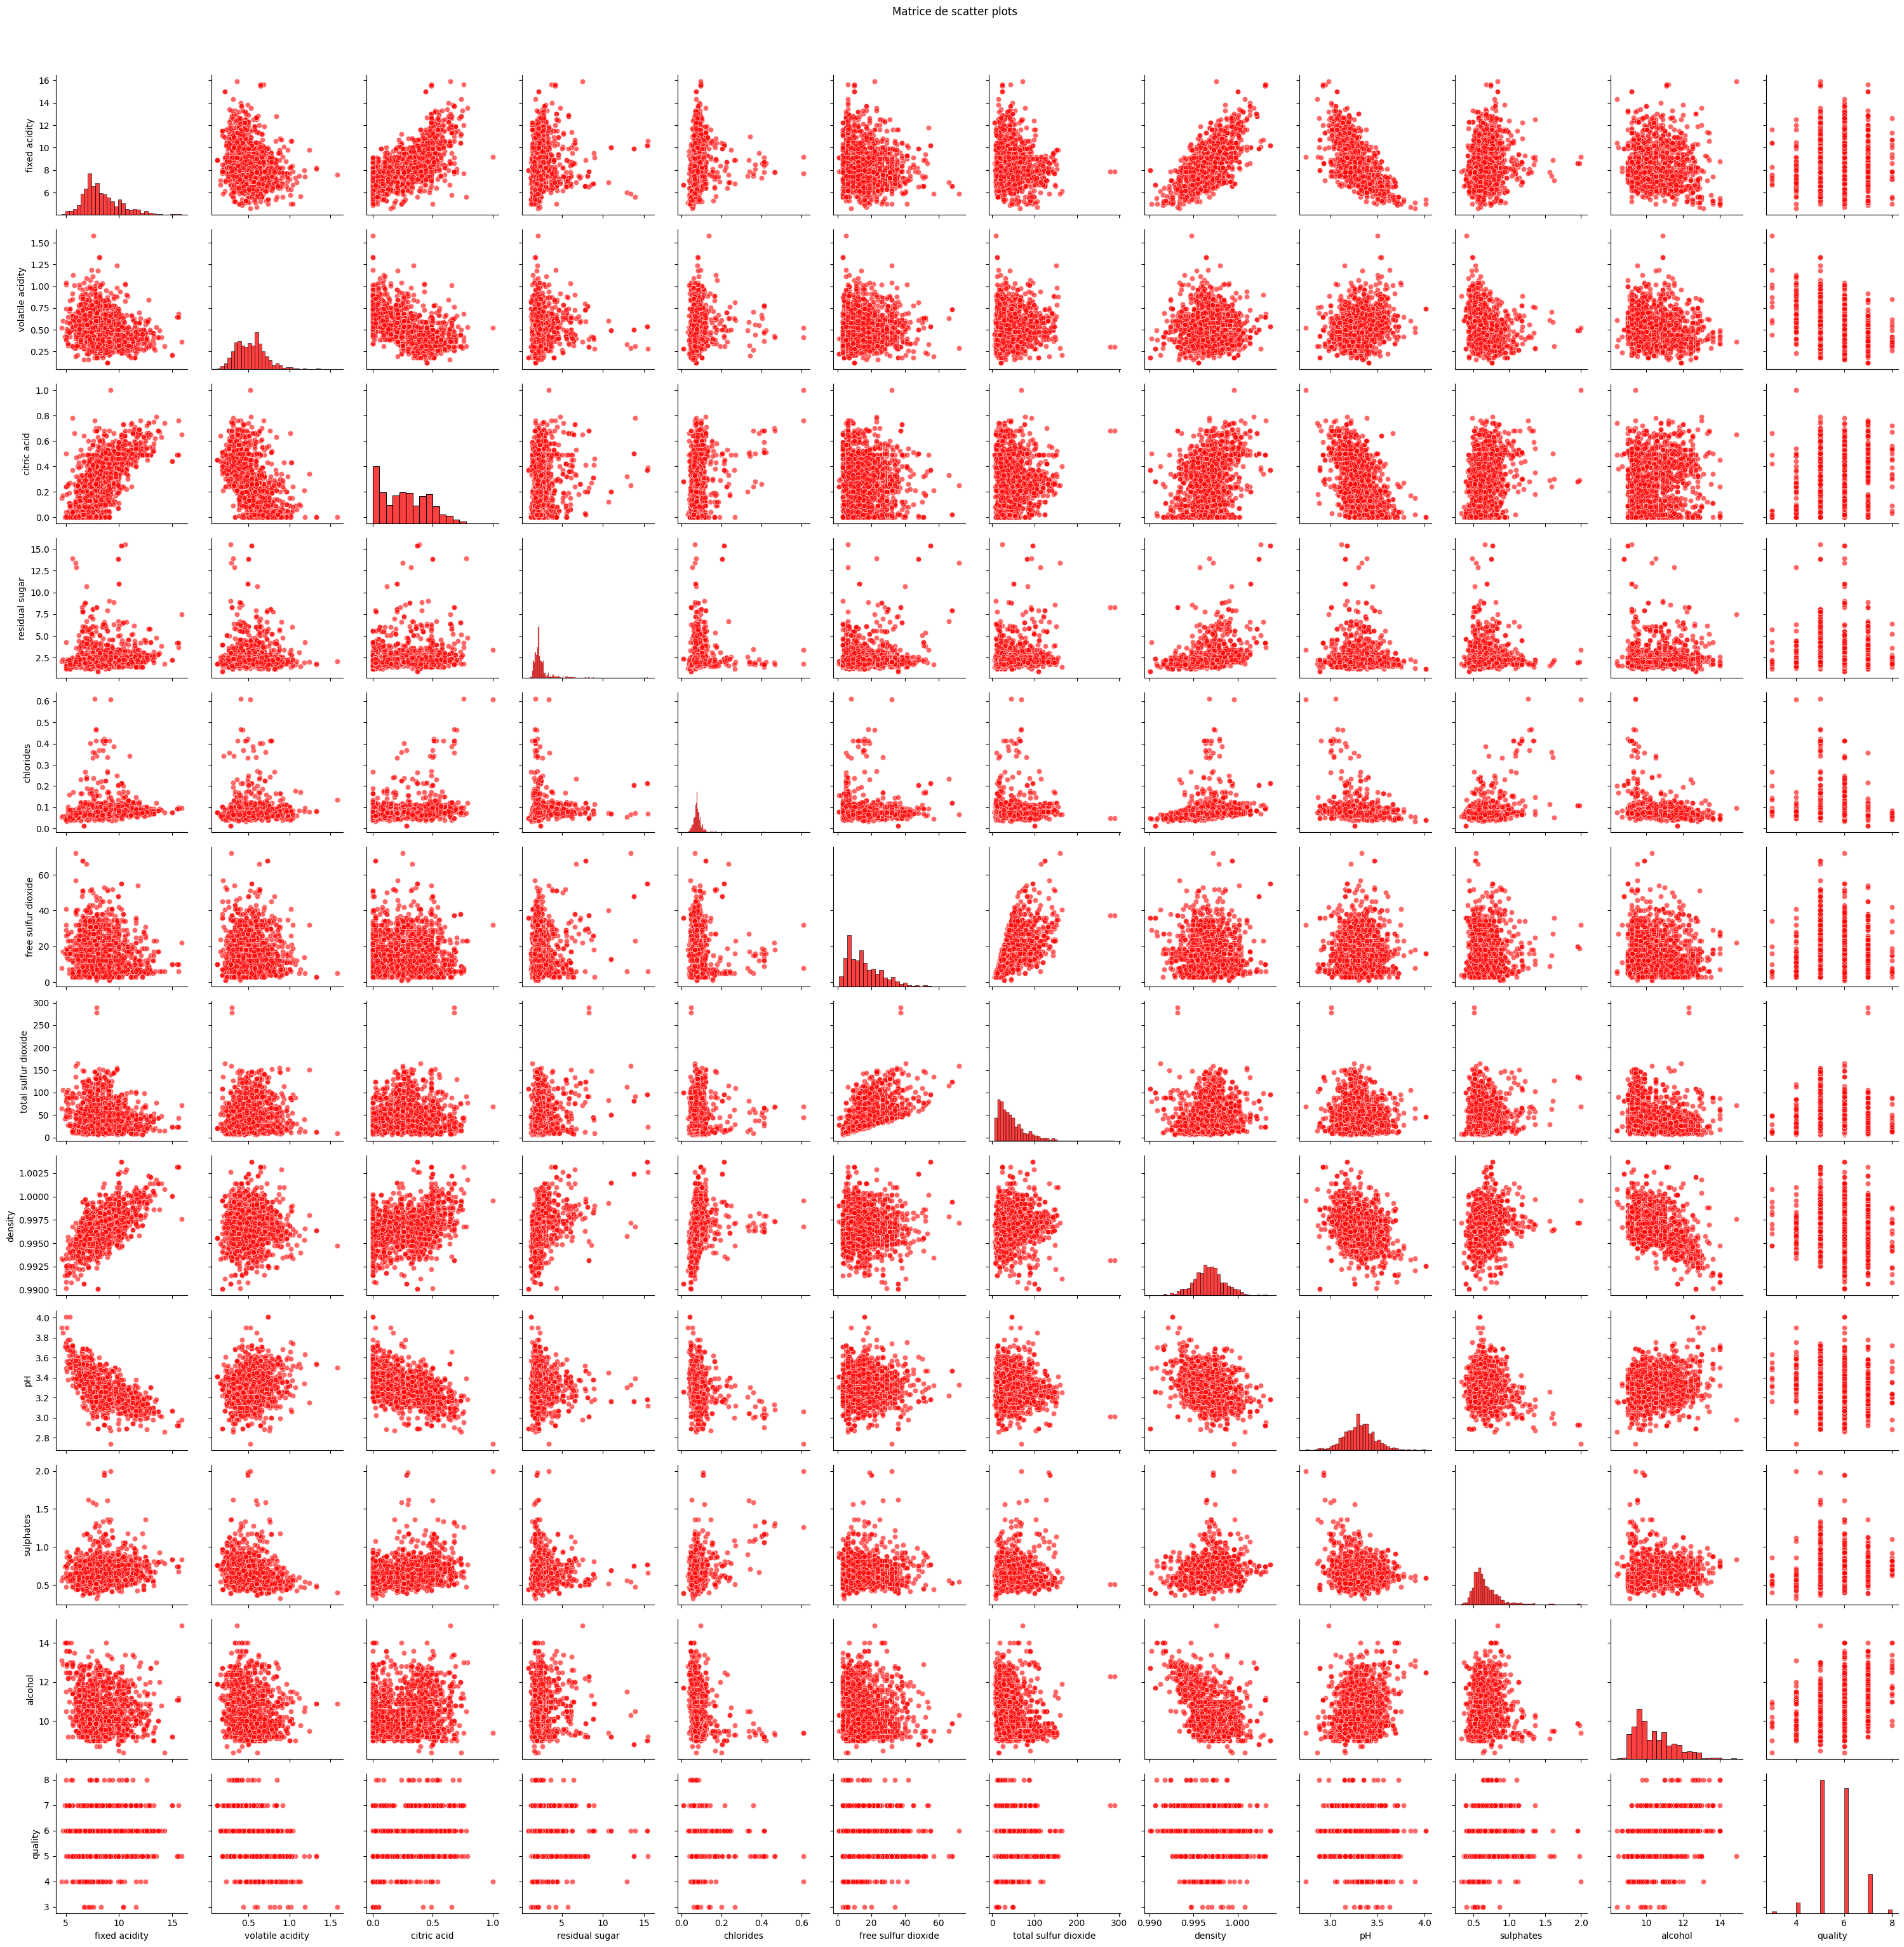

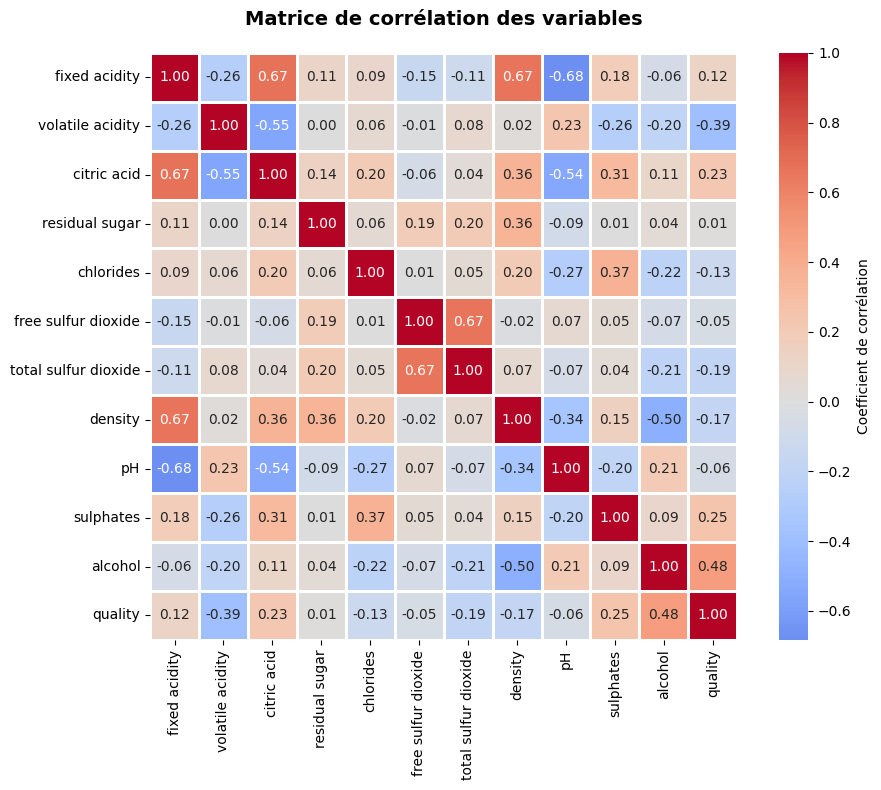

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def exploratory_data_analysis_df(data):
    # Head, shape, types
    print("\n=== Head ===")
    display(data.head())
    print("\n=== Shape ===")
    print(data.shape)
    print("\n=== Types ===")
    print(data.dtypes)
    print("\n=== Info ===")
    print(data.info())
    print("\n=== Statistiques descriptives ===")
    display(data.describe())
    
    # Colonnes numériques
    numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    
    # Analyse des valeurs manquantes
    print("="*70)
    print("MISSING VALUES ANALYSIS")
    print("="*70)
    missing_counts = data.isnull().sum()
    missing_percentages = (missing_counts / len(data)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing_counts,
        'Percentage (%)': missing_percentages
    })
    display(missing_df)
    
    if missing_counts.sum() > 0:
        plt.figure(figsize=(10, 6))
        missing_df['Percentage (%)'].plot(kind='bar', color='coral', edgecolor='black')
        plt.title('Percentage of Missing Values by Variable', fontsize=14, fontweight='bold')
        plt.ylabel('Percentage (%)')
        plt.xlabel('Variables')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("\n✅ No missing values detected in the dataset!")

    # Histogrammes
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=False, color="red", edgecolor="black", linewidth=1.5, bins=30)
        plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=12, fontweight='bold')
        plt.ylabel('Frequency', fontsize=12, fontweight='bold')
        plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.8)
        plt.tight_layout()
        plt.show()
    
    # Boxplots
    fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
    if len(numerical_cols) == 1:
        axes = [axes]
    for i, column in enumerate(numerical_cols):
        sns.boxplot(x=data[column], ax=axes[i], color='red')
        axes[i].set_title(f'Boxplot de {column}')
        axes[i].set_xlabel(column)
    plt.tight_layout()
    plt.show()
    
    # Outliers
    for column in numerical_cols:
        print(f"\n=== Outliers pour {column} ===")
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_positions = ((data[column] < lower_bound) | (data[column] > upper_bound))
        print(f"Nombre d'outliers : {outlier_positions.sum()}")

    # Pairplot
    sns.pairplot(data[numerical_cols], diag_kind='hist', plot_kws={'alpha':0.6,'color':'red'}, diag_kws={'color':'red'})
    plt.suptitle('Matrice de scatter plots', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Corrélation (encoder les colonnes catégorielles automatiquement)
    data_encoded = data.copy()
    cat_cols = data_encoded.select_dtypes(include=['object','category']).columns
    for col in cat_cols:
        data_encoded[col] = data_encoded[col].astype('category').cat.codes

    correlation_matrix = data_encoded.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True,
                linewidths=1, cbar_kws={'label':'Coefficient de corrélation'})
    plt.title('Matrice de corrélation des variables', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    return data

# Appel de la fonction
data1 = pd.read_csv("winequality-red.csv", sep=";")
exploratory_data_analysis_df(data1)


In [4]:
## DSO 1 :   Implement Reinforcement Learning Trees (RLT) using: Embedded models , Variable muting ,  Linear combination splits

#This implementation includes:
#1. RLT Standard
#2. RLT + Variable Muting
#3. RLT + Linear Combination Splits
#4. RLT + Different Embedded Models (RF, ET)

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import make_regression, make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Literal, Optional, Union
import warnings
warnings.filterwarnings('ignore')


REINFORCEMENT LEARNING TREES (RLT) IMPLEMENTATION
Based on: Zhu, Zeng & Kosorok (2015), JASA
REINFORCEMENT LEARNING TREES - Strategy Comparison

SCENARIO 2: Non-linear Model

1. Baseline: Standard Random Forest
   MSE: 5.6596

2. RLT Standard (no muting, k=1)

Training RLT with:
  - Embedded Model: ET
  - Variable Muting: False (rate=0.5)
  - Linear Combination: False (k=1)
  - Trees: 50
  Building tree 20/50...
  Building tree 40/50...
Training completed!

   MSE: 7.0591

3. RLT + Variable Muting (moderate, 50%)

Training RLT with:
  - Embedded Model: ET
  - Variable Muting: True (rate=0.5)
  - Linear Combination: False (k=1)
  - Trees: 50
  Building tree 20/50...
  Building tree 40/50...
Training completed!

   MSE: 5.0578

4. RLT + Variable Muting (aggressive, 80%)

Training RLT with:
  - Embedded Model: ET
  - Variable Muting: True (rate=0.8)
  - Linear Combination: False (k=1)
  - Trees: 50
  Building tree 20/50...
  Building tree 40/50...
Training completed!

   MSE: 3.4872

5. 

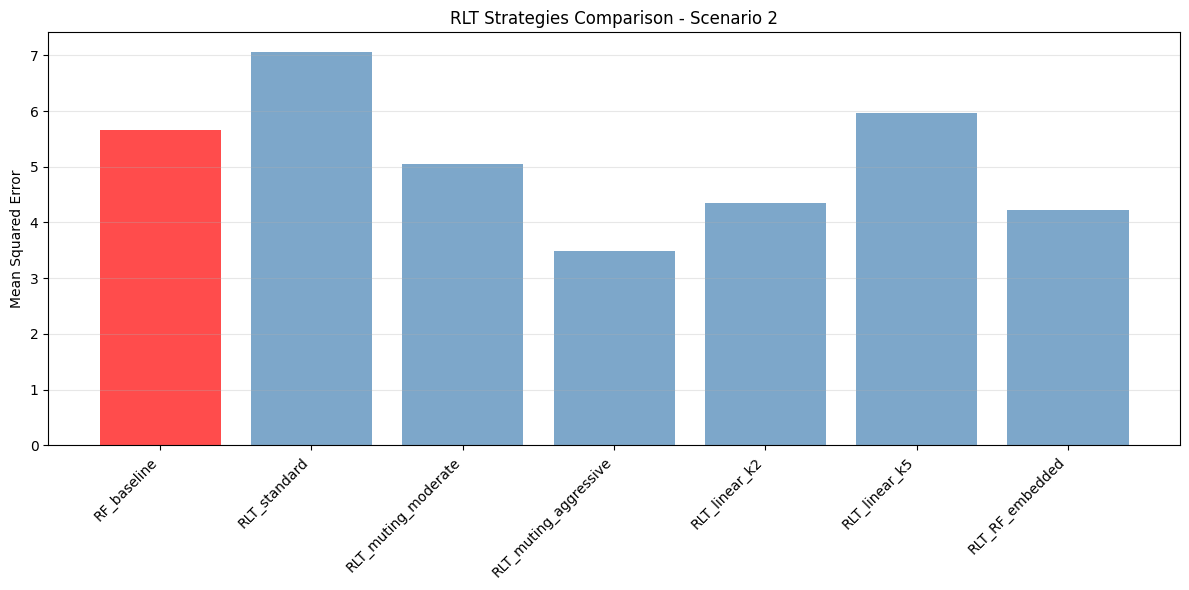

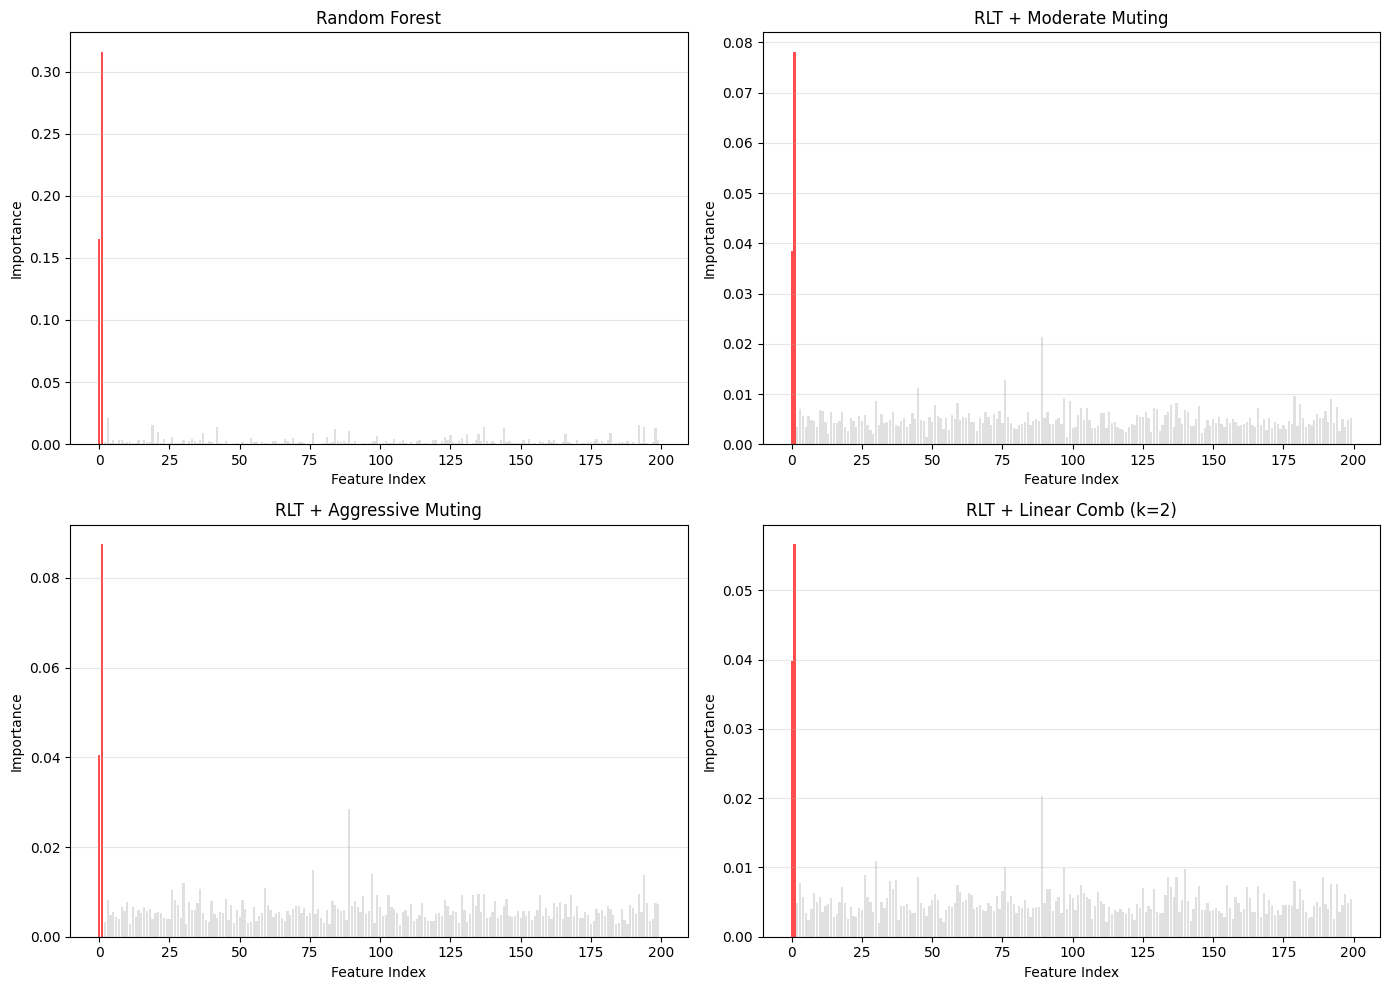


EMBEDDED MODEL COMPARISON

1. RLT with Random Forest as embedded model

Training RLT with:
  - Embedded Model: RF
  - Variable Muting: True (rate=0.8)
  - Linear Combination: True (k=2)
  - Trees: 50
  Building tree 20/50...
  Building tree 40/50...
Training completed!

   MSE: 3.4573

2. RLT with Extra Trees as embedded model

Training RLT with:
  - Embedded Model: ET
  - Variable Muting: True (rate=0.8)
  - Linear Combination: True (k=2)
  - Trees: 50
  Building tree 20/50...
  Building tree 40/50...
Training completed!

   MSE: 3.8742

Embedded Model Comparison:
  RLT_with_RF: 3.4573
  RLT_with_ET: 3.8742

ANALYSIS COMPLETE

Key Findings:
1. Variable muting significantly improves performance in high-dimensional settings
2. Linear combination splits (k=2) provide good balance between flexibility and stability
3. Aggressive muting (80%) works best when combined with reinforcement learning
4. Both RF and ET work well as embedded models, with ET being faster


In [6]:
class ReinforcementLearningTree:
    """
    Reinforcement Learning Tree with configurable strategies
    """
    
    def __init__(
        self,
        n_estimators: int = 100,
        task: Literal['regression', 'classification'] = 'regression',
        embedded_model: Literal['rf', 'et'] = 'rf',
        use_variable_muting: bool = False,
        muting_rate: float = 0.5,  # 0, 0.5 (moderate), 0.8 (aggressive)
        use_linear_combination: bool = False,
        k_linear: int = 1,  # Number of variables in linear combination
        alpha: float = 0.25,  # Minimum VI threshold
        p_protected: Optional[int] = None,
        min_samples_split: int = 10,
        max_depth: Optional[int] = None,
        random_state: int = 42
    ):
        self.n_estimators = n_estimators
        self.task = task
        self.embedded_model = embedded_model
        self.use_variable_muting = use_variable_muting
        self.muting_rate = muting_rate
        self.use_linear_combination = use_linear_combination
        self.k_linear = k_linear
        self.alpha = alpha
        self.p_protected = p_protected
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.random_state = random_state
        
        self.trees_ = []
        self.feature_importances_ = None
        self.n_features_ = None
        
    def _get_embedded_model(self, n_features: int):
        """Create embedded model for variable importance calculation"""
        n_trees = min(100, max(50, n_features // 5))
        
        if self.task == 'regression':
            if self.embedded_model == 'rf':
                return RandomForestRegressor(
                    n_estimators=n_trees,
                    max_features='sqrt',
                    bootstrap=True,
                    oob_score=True,
                    random_state=self.random_state,
                    n_jobs=-1
                )
            else:  # ET
                return ExtraTreesRegressor(
                    n_estimators=n_trees,
                    max_features='sqrt',
                    bootstrap=True,
                    oob_score=True,
                    random_state=self.random_state,
                    n_jobs=-1
                )
        else:
            if self.embedded_model == 'rf':
                return RandomForestClassifier(
                    n_estimators=n_trees,
                    max_features='sqrt',
                    bootstrap=True,
                    oob_score=True,
                    random_state=self.random_state,
                    n_jobs=-1
                )
            else:  # ET
                return ExtraTreesClassifier(
                    n_estimators=n_trees,
                    max_features='sqrt',
                    bootstrap=True,
                    oob_score=True,
                    random_state=self.random_state,
                    n_jobs=-1
                )
    
    def _calculate_variable_importance(self, X, y, active_features):
        """
        Calculate variable importance using embedded model
        Based on permutation importance (Breiman 2001)
        """
        if len(active_features) == 0:
            return np.array([])
        
        # Fit embedded model on active features only
        X_active = X[:, active_features]
        
        # Use bootstrap sample for embedded model
        n_samples = X_active.shape[0]
        boot_idx = np.random.choice(n_samples, size=n_samples, replace=True)
        oob_idx = np.array([i for i in range(n_samples) if i not in boot_idx])
        
        if len(oob_idx) < 5:  # Not enough OOB samples
            return np.zeros(len(active_features))
        
        embedded = self._get_embedded_model(len(active_features))
        embedded.fit(X_active[boot_idx], y[boot_idx])
        
        # Calculate baseline error on OOB samples
        y_pred = embedded.predict(X_active[oob_idx])
        baseline_error = mean_squared_error(y[oob_idx], y_pred) if self.task == 'regression' \
                        else 1 - accuracy_score(y[oob_idx], y_pred)
        
        # Calculate permutation importance
        importances = np.zeros(len(active_features))
        for i, feat_idx in enumerate(active_features):
            X_permuted = X_active[oob_idx].copy()
            np.random.shuffle(X_permuted[:, i])
            y_pred_perm = embedded.predict(X_permuted)
            perm_error = mean_squared_error(y[oob_idx], y_pred_perm) if self.task == 'regression' \
                        else 1 - accuracy_score(y[oob_idx], y_pred_perm)
            
            importances[i] = (perm_error / baseline_error) - 1 if baseline_error > 0 else 0
        
        return np.maximum(importances, 0)  # Ensure non-negative
    
    def _select_splitting_variables(self, X, y, active_features, protected_features):
        """
        Select splitting variable(s) using reinforcement learning approach
        Returns: selected features and their coefficients for linear combination
        """
        if len(active_features) == 0:
            return [], []
        
        # Calculate variable importance
        vi = self._calculate_variable_importance(X, y, active_features)
        
        if np.sum(vi) == 0:  # All importances are zero
            # Random selection
            selected_idx = np.random.choice(len(active_features))
            return [active_features[selected_idx]], [1.0]
        
        # Sort by importance
        sorted_indices = np.argsort(vi)[::-1]
        
        if not self.use_linear_combination or self.k_linear == 1:
            # Single variable split
            best_idx = sorted_indices[0]
            return [active_features[best_idx]], [1.0]
        
        # Linear combination split
        max_vi = vi[sorted_indices[0]]
        threshold = self.alpha * max_vi
        
        selected_features = []
        coefficients = []
        
        for idx in sorted_indices[:self.k_linear]:
            if vi[idx] >= threshold and vi[idx] > 0:
                feat_idx = active_features[idx]
                selected_features.append(feat_idx)
                
                # Calculate correlation sign
                corr = np.corrcoef(X[:, feat_idx], y)[0, 1]
                sign = np.sign(corr) if not np.isnan(corr) else 1.0
                
                # Coefficient: sign * sqrt(VI)
                coef = sign * np.sqrt(vi[idx])
                coefficients.append(coef)
        
        if len(selected_features) == 0:
            best_idx = sorted_indices[0]
            return [active_features[best_idx]], [1.0]
        
        return selected_features, coefficients
    
    def _update_muted_protected(self, vi_dict, active_features, protected_features, p_total):
        """
        Update muted and protected feature sets
        """
        if not self.use_variable_muting:
            return active_features, protected_features
        
        # Calculate number of features to mute
        n_to_mute = int(self.muting_rate * len(active_features))
        
        if n_to_mute == 0 or len(active_features) <= (self.p_protected or 0):
            return active_features, protected_features
        
        # Get importances for active features
        importances = [(f, vi_dict.get(f, 0)) for f in active_features 
                      if f not in protected_features]
        
        if len(importances) == 0:
            return active_features, protected_features
        
        # Sort by importance and mute lowest
        importances.sort(key=lambda x: x[1])
        to_mute = [f for f, _ in importances[:n_to_mute]]
        
        # Update active features
        new_active = [f for f in active_features if f not in to_mute]
        
        return new_active, protected_features
    
    def _build_tree(self, X, y, active_features, protected_features, depth=0):
        """
        Recursively build a single RLT tree
        """
        n_samples, n_features = X.shape
        
        # Stopping criteria
        if (n_samples < self.min_samples_split or 
            len(active_features) == 0 or
            (self.max_depth is not None and depth >= self.max_depth)):
            return {'type': 'leaf', 'value': np.mean(y)}
        
        # Select splitting variables using RL
        split_features, coefficients = self._select_splitting_variables(
            X, y, active_features, protected_features
        )
        
        if len(split_features) == 0:
            return {'type': 'leaf', 'value': np.mean(y)}
        
        # Create linear combination
        if len(split_features) == 1:
            split_values = X[:, split_features[0]]
        else:
            split_values = np.zeros(n_samples)
            for feat, coef in zip(split_features, coefficients):
                split_values += coef * X[:, feat]
        
        # Find split point (random between quantiles)
        q_low, q_high = 0.25, 0.75
        low_val = np.quantile(split_values, q_low)
        high_val = np.quantile(split_values, q_high)
        
        if low_val == high_val:
            return {'type': 'leaf', 'value': np.mean(y)}
        
        split_point = np.random.uniform(low_val, high_val)
        
        # Split data
        left_mask = split_values <= split_point
        right_mask = ~left_mask
        
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return {'type': 'leaf', 'value': np.mean(y)}
        
        # Update protected features
        new_protected = set(protected_features).union(set(split_features))
        
        # Calculate VI for muting update
        vi = self._calculate_variable_importance(X, y, active_features)
        vi_dict = {active_features[i]: vi[i] for i in range(len(active_features))}
        
        # Update active and protected for children
        left_active, left_protected = self._update_muted_protected(
            vi_dict, active_features, new_protected, n_features
        )
        right_active, right_protected = left_active.copy(), left_protected.copy()
        
        # Recursively build children
        left_child = self._build_tree(
            X[left_mask], y[left_mask], left_active, left_protected, depth + 1
        )
        right_child = self._build_tree(
            X[right_mask], y[right_mask], right_active, right_protected, depth + 1
        )
        
        return {
            'type': 'node',
            'features': split_features,
            'coefficients': coefficients,
            'split_point': split_point,
            'left': left_child,
            'right': right_child
        }
    
    def _predict_tree(self, tree, X):
        """Predict using a single tree"""
        if tree['type'] == 'leaf':
            return np.full(X.shape[0], tree['value'])
        
        # Calculate split values
        if len(tree['features']) == 1:
            split_values = X[:, tree['features'][0]]
        else:
            split_values = np.zeros(X.shape[0])
            for feat, coef in zip(tree['features'], tree['coefficients']):
                split_values += coef * X[:, feat]
        
        predictions = np.zeros(X.shape[0])
        left_mask = split_values <= tree['split_point']
        
        if np.any(left_mask):
            predictions[left_mask] = self._predict_tree(tree['left'], X[left_mask])
        if np.any(~left_mask):
            predictions[~left_mask] = self._predict_tree(tree['right'], X[~left_mask])
        
        return predictions
    
    def fit(self, X, y):
        """Fit the RLT ensemble"""
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        
        self.n_features_ = X.shape[1]
        
        # Set protected features
        if self.p_protected is None:
            self.p_protected = max(1, int(np.log(self.n_features_)))
        
        print(f"\nTraining RLT with:")
        print(f"  - Embedded Model: {self.embedded_model.upper()}")
        print(f"  - Variable Muting: {self.use_variable_muting} (rate={self.muting_rate})")
        print(f"  - Linear Combination: {self.use_linear_combination} (k={self.k_linear})")
        print(f"  - Trees: {self.n_estimators}")
        
        # Build trees with bootstrap
        self.trees_ = []
        all_importances = np.zeros(self.n_features_)
        
        for i in range(self.n_estimators):
            if (i + 1) % 20 == 0:
                print(f"  Building tree {i+1}/{self.n_estimators}...")
            
            # Bootstrap sample
            boot_idx = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            X_boot = X[boot_idx]
            y_boot = y[boot_idx]
            
            # Initial active features (all features)
            active_features = list(range(self.n_features_))
            protected_features = set()
            
            # Build tree
            tree = self._build_tree(X_boot, y_boot, active_features, protected_features)
            self.trees_.append(tree)
            
            # Accumulate feature importances (simplified)
            tree_imp = self._calculate_variable_importance(X_boot, y_boot, active_features)
            all_importances[:len(tree_imp)] += tree_imp
        
        self.feature_importances_ = all_importances / self.n_estimators
        print("Training completed!\n")
        
        return self
    
    def predict(self, X):
        """Make predictions"""
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        predictions = np.zeros((X.shape[0], len(self.trees_)))
        
        for i, tree in enumerate(self.trees_):
            predictions[:, i] = self._predict_tree(tree, X)
        
        # Average predictions (or majority vote for classification)
        if self.task == 'regression':
            return np.mean(predictions, axis=1)
        else:
            return (np.mean(predictions, axis=1) > 0.5).astype(int)


# ============================================================================
# DEMONSTRATION AND COMPARISON
# ============================================================================

def create_test_scenarios():
    """Create test scenarios from the paper"""
    
    # Scenario 2: Non-linear with independent covariates
    def scenario_2(n=200, p=200):
        np.random.seed(42)
        X = np.random.uniform(0, 1, (n, p))
        # Strong variables: X[0] and X[1]
        y = 100 * (X[:, 0] - 0.5)**2 * np.maximum(X[:, 1] - 0.25, 0) + np.random.normal(0, 1, n)
        return X, y
    
    # Scenario 3: Checkerboard with correlation
    def scenario_3(n=300, p=200):
        np.random.seed(42)
        # Create correlation matrix
        corr = np.array([[0.9**abs(i-j) for j in range(p)] for i in range(p)])
        L = np.linalg.cholesky(corr)
        X = np.random.randn(n, p) @ L.T
        
        # Strong variables: X[49], X[99], X[149], X[199] (0-indexed)
        y = (2 * X[:, 49] * X[:, 99] + 
             2 * X[:, 149] * X[:, 199] + 
             np.random.normal(0, 1, n))
        return X, y
    
    return {
        'scenario_2': scenario_2,
        'scenario_3': scenario_3
    }


def compare_rlt_strategies():
    """Compare different RLT strategies as in the paper"""
    
    print("="*80)
    print("REINFORCEMENT LEARNING TREES - Strategy Comparison")
    print("="*80)
    
    scenarios = create_test_scenarios()
    
    # Test on Scenario 2
    print("\n" + "="*80)
    print("SCENARIO 2: Non-linear Model")
    print("="*80)
    X, y = scenarios['scenario_2'](n=200, p=200)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    results = {}
    
    # 1. Standard Random Forest (baseline)
    print("\n1. Baseline: Standard Random Forest")
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    results['RF_baseline'] = mean_squared_error(y_test, y_pred)
    print(f"   MSE: {results['RF_baseline']:.4f}")
    
    # 2. RLT Standard (no muting, k=1)
    print("\n2. RLT Standard (no muting, k=1)")
    rlt1 = ReinforcementLearningTree(
        n_estimators=50,
        task='regression',
        embedded_model='et',
        use_variable_muting=False,
        use_linear_combination=False,
        k_linear=1,
        random_state=42
    )
    rlt1.fit(X_train, y_train)
    y_pred = rlt1.predict(X_test)
    results['RLT_standard'] = mean_squared_error(y_test, y_pred)
    print(f"   MSE: {results['RLT_standard']:.4f}")
    
    # 3. RLT + Variable Muting (moderate)
    print("\n3. RLT + Variable Muting (moderate, 50%)")
    rlt2 = ReinforcementLearningTree(
        n_estimators=50,
        task='regression',
        embedded_model='et',
        use_variable_muting=True,
        muting_rate=0.5,
        use_linear_combination=False,
        k_linear=1,
        random_state=42
    )
    rlt2.fit(X_train, y_train)
    y_pred = rlt2.predict(X_test)
    results['RLT_muting_moderate'] = mean_squared_error(y_test, y_pred)
    print(f"   MSE: {results['RLT_muting_moderate']:.4f}")
    
    # 4. RLT + Variable Muting (aggressive)
    print("\n4. RLT + Variable Muting (aggressive, 80%)")
    rlt3 = ReinforcementLearningTree(
        n_estimators=50,
        task='regression',
        embedded_model='et',
        use_variable_muting=True,
        muting_rate=0.8,
        use_linear_combination=False,
        k_linear=1,
        random_state=42
    )
    rlt3.fit(X_train, y_train)
    y_pred = rlt3.predict(X_test)
    results['RLT_muting_aggressive'] = mean_squared_error(y_test, y_pred)
    print(f"   MSE: {results['RLT_muting_aggressive']:.4f}")
    
    # 5. RLT + Linear Combination (k=2)
    print("\n5. RLT + Linear Combination (k=2, aggressive muting)")
    rlt4 = ReinforcementLearningTree(
        n_estimators=50,
        task='regression',
        embedded_model='et',
        use_variable_muting=True,
        muting_rate=0.8,
        use_linear_combination=True,
        k_linear=2,
        random_state=42
    )
    rlt4.fit(X_train, y_train)
    y_pred = rlt4.predict(X_test)
    results['RLT_linear_k2'] = mean_squared_error(y_test, y_pred)
    print(f"   MSE: {results['RLT_linear_k2']:.4f}")
    
    # 6. RLT + Linear Combination (k=5)
    print("\n6. RLT + Linear Combination (k=5, aggressive muting)")
    rlt5 = ReinforcementLearningTree(
        n_estimators=50,
        task='regression',
        embedded_model='et',
        use_variable_muting=True,
        muting_rate=0.8,
        use_linear_combination=True,
        k_linear=5,
        random_state=42
    )
    rlt5.fit(X_train, y_train)
    y_pred = rlt5.predict(X_test)
    results['RLT_linear_k5'] = mean_squared_error(y_test, y_pred)
    print(f"   MSE: {results['RLT_linear_k5']:.4f}")
    
    # 7. RLT with RF as embedded model
    print("\n7. RLT with Random Forest as embedded model")
    rlt6 = ReinforcementLearningTree(
        n_estimators=50,
        task='regression',
        embedded_model='rf',
        use_variable_muting=True,
        muting_rate=0.8,
        use_linear_combination=True,
        k_linear=2,
        random_state=42
    )
    rlt6.fit(X_train, y_train)
    y_pred = rlt6.predict(X_test)
    results['RLT_RF_embedded'] = mean_squared_error(y_test, y_pred)
    print(f"   MSE: {results['RLT_RF_embedded']:.4f}")
    
    # Summary
    print("\n" + "="*80)
    print("RESULTS SUMMARY")
    print("="*80)
    print(f"{'Method':<35} {'MSE':<15} {'Improvement vs RF'}")
    print("-"*80)
    
    baseline = results['RF_baseline']
    for method, mse in sorted(results.items(), key=lambda x: x[1]):
        improvement = ((baseline - mse) / baseline) * 100
        print(f"{method:<35} {mse:<15.4f} {improvement:>6.2f}%")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    
    methods = list(results.keys())
    mses = list(results.values())
    colors = ['red' if 'baseline' in m else 'steelblue' if 'RLT' in m else 'gray' for m in methods]
    
    plt.bar(range(len(methods)), mses, color=colors, alpha=0.7)
    plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
    plt.ylabel('Mean Squared Error')
    plt.title('RLT Strategies Comparison - Scenario 2')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Feature importance comparison
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot feature importances for different methods
    for idx, (model, title) in enumerate([
        (rf, 'Random Forest'),
        (rlt2, 'RLT + Moderate Muting'),
        (rlt3, 'RLT + Aggressive Muting'),
        (rlt4, 'RLT + Linear Comb (k=2)')
    ]):
        ax = axes[idx // 2, idx % 2]
        importances = model.feature_importances_
        
        # Highlight strong variables (0 and 1)
        colors_imp = ['red' if i in [0, 1] else 'lightgray' for i in range(len(importances))]
        
        ax.bar(range(len(importances)), importances, color=colors_imp, alpha=0.7)
        ax.set_xlabel('Feature Index')
        ax.set_ylabel('Importance')
        ax.set_title(title)
        ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results


def demonstrate_embedded_models():
    """Compare different embedded models"""
    
    print("\n" + "="*80)
    print("EMBEDDED MODEL COMPARISON")
    print("="*80)
    
    scenarios = create_test_scenarios()
    X, y = scenarios['scenario_2'](n=200, p=200)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    results = {}
    
    # RLT with Random Forest embedded
    print("\n1. RLT with Random Forest as embedded model")
    rlt_rf = ReinforcementLearningTree(
        n_estimators=50,
        embedded_model='rf',
        use_variable_muting=True,
        muting_rate=0.8,
        use_linear_combination=True,
        k_linear=2,
        random_state=42
    )
    rlt_rf.fit(X_train, y_train)
    y_pred = rlt_rf.predict(X_test)
    results['RLT_with_RF'] = mean_squared_error(y_test, y_pred)
    print(f"   MSE: {results['RLT_with_RF']:.4f}")
    
    # RLT with Extra Trees embedded
    print("\n2. RLT with Extra Trees as embedded model")
    rlt_et = ReinforcementLearningTree(
        n_estimators=50,
        embedded_model='et',
        use_variable_muting=True,
        muting_rate=0.8,
        use_linear_combination=True,
        k_linear=2,
        random_state=42
    )
    rlt_et.fit(X_train, y_train)
    y_pred = rlt_et.predict(X_test)
    results['RLT_with_ET'] = mean_squared_error(y_test, y_pred)
    print(f"   MSE: {results['RLT_with_ET']:.4f}")
    
    print("\n" + "="*80)
    print("Embedded Model Comparison:")
    for method, mse in results.items():
        print(f"  {method}: {mse:.4f}")
    
    return results


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("\n" + "="*80)
    print("REINFORCEMENT LEARNING TREES (RLT) IMPLEMENTATION")
    print("Based on: Zhu, Zeng & Kosorok (2015), JASA")
    print("="*80)
    
    # Run comparisons
    strategy_results = compare_rlt_strategies()
    
    # Compare embedded models
    embedded_results = demonstrate_embedded_models()
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE")
    print("="*80)
    print("\nKey Findings:")
    print("1. Variable muting significantly improves performance in high-dimensional settings")
    print("2. Linear combination splits (k=2) provide good balance between flexibility and stability")
    print("3. Aggressive muting (80%) works best when combined with reinforcement learning")
    print("4. Both RF and ET work well as embedded models, with ET being faster")
    print("="*80)